In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv('../data/csv/DC_Tweets_5days_CSV.csv')
#df.head

/Users/jacquelinekazil/Projects/envs/class/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
lookup_keys=['X','Y']

## K-means samples

In [5]:
from sklearn.cluster import KMeans

df = df
def graph_kmeans(clusters, lookup_keys=['X','Y']):
    k_means = KMeans(clusters)  # number of clusters
    output = k_means.fit(df[lookup_keys]).labels_
    
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw={'axisbelow':True})
    ax.scatter(df['X'], df['Y'], c=output)
    return

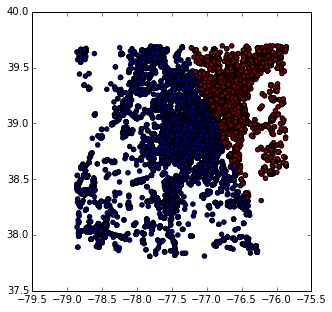

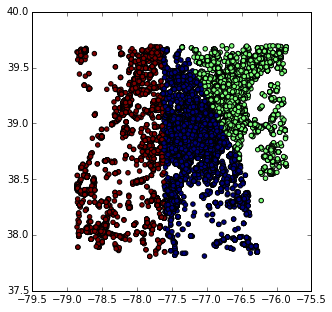

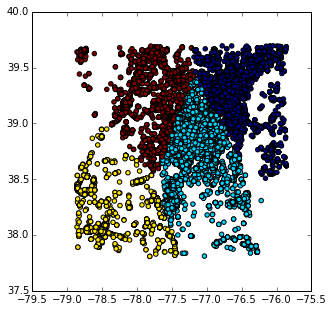

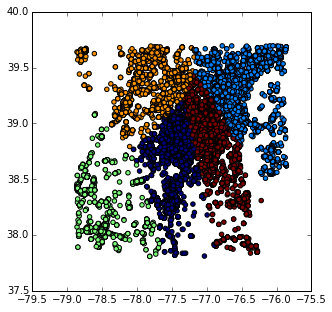

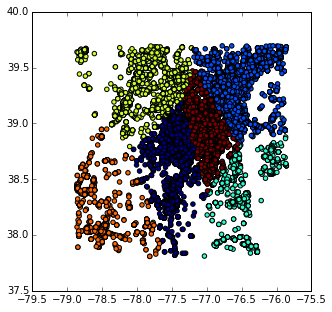

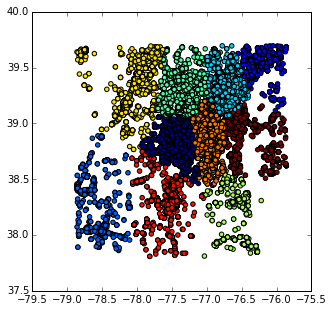

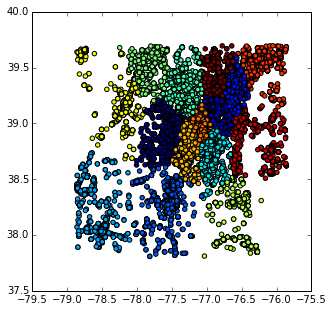

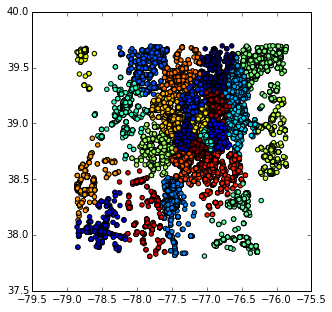

In [11]:
graph_kmeans(2)
graph_kmeans(3)
graph_kmeans(4)
graph_kmeans(5)
graph_kmeans(6)
graph_kmeans(10)
graph_kmeans(15)
graph_kmeans(25)

## DBSCAN
http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

In [40]:
import numpy as np

In [41]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [42]:
def plot_dbscan(df, n_recs):
    df_subset = df.loc[np.random.choice(df.index, n_recs, replace=False)]
    lookup_keys=['X','Y']
    X = StandardScaler().fit_transform(df_subset[lookup_keys])
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)  
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print('Estimated number of clusters: %d' % n_clusters_)

    ##############################################################################
    # Plot result
    import matplotlib.pyplot as plt

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]  
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()


Estimated number of clusters: 2


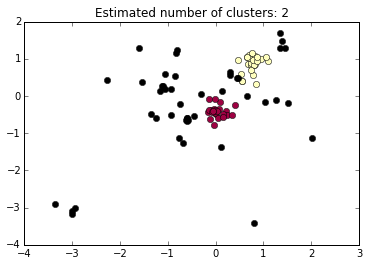

Estimated number of clusters: 2


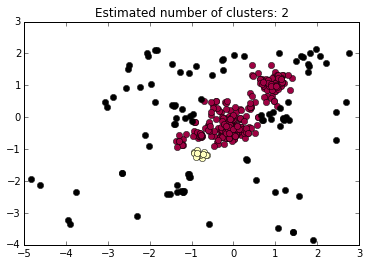

Estimated number of clusters: 4


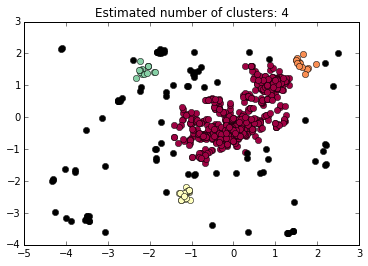

Estimated number of clusters: 10


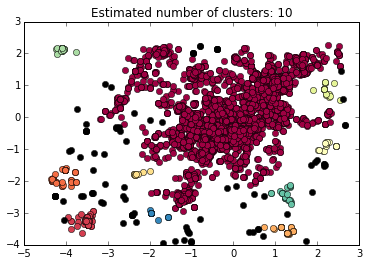

Estimated number of clusters: 13


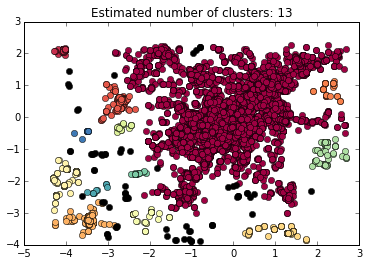

In [48]:
#plot_dbscan(df, n_recs)
plot_dbscan(df, 100)
plot_dbscan(df, 500)
plot_dbscan(df, 1000)
plot_dbscan(df, 10000)
plot_dbscan(df, 20000)


## Affinity Propagation

In [6]:
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

##############################################################################
# Compute Affinity Propagation

def compute_affinity(df, n_recs, preference=-10):
    df_subset = df.loc[np.random.choice(df.index, n_recs, replace=False)]
    df = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))

    X = df_subset[lookup_keys]
    X = X.as_matrix()
    af = AffinityPropagation(preference=preference).fit(X)
    
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)

    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

    ##############################################################################
    # Plot result
    from itertools import cycle

    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]

        
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=8)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    return

The affinities below are all the same sample size. The only difference is the actual sample pulled.

Estimated number of clusters: 406
Silhouette Coefficient: 0.117


/Users/jacquelinekazil/Projects/envs/class/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


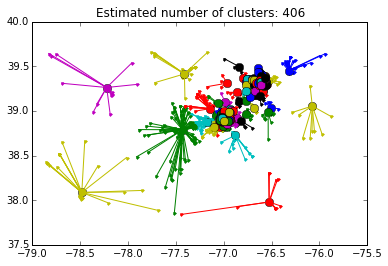

In [7]:
compute_affinity(df, 1000)  #preference = -10

Estimated number of clusters: 5
Silhouette Coefficient: 0.721


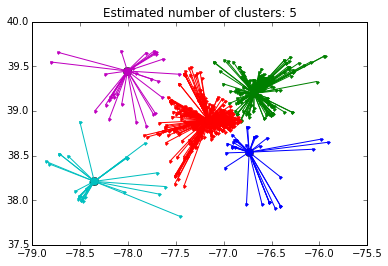

In [8]:
compute_affinity(df, 1000)  #preference = -10

Estimated number of clusters: 830
Silhouette Coefficient: 0.053


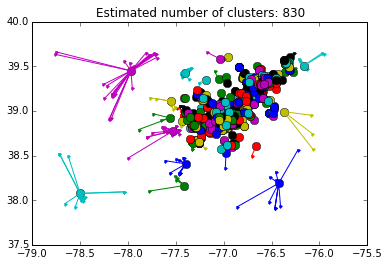

In [9]:
compute_affinity(df, 1000) #preference = -10

Estimated number of clusters: 481
Silhouette Coefficient: 0.158


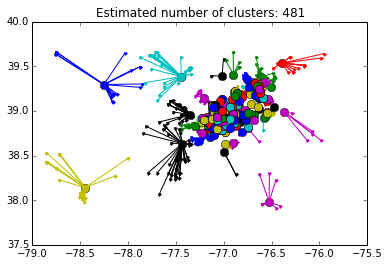

In [11]:
compute_affinity(df, 1000) #preference = -10

Estimated number of clusters: 563
Silhouette Coefficient: 0.282


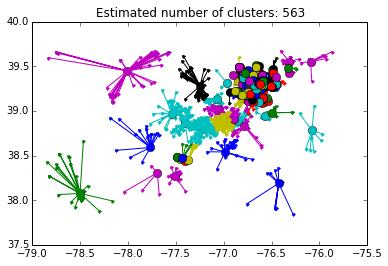

In [12]:
compute_affinity(df, 2000)

Estimated number of clusters: 26
Silhouette Coefficient: 0.206


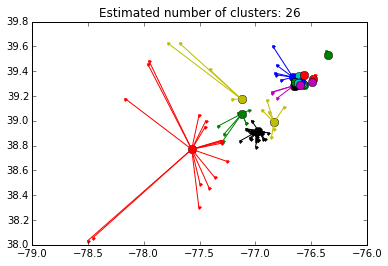

In [13]:
compute_affinity(df, 100)

Estimated number of clusters: 2
Silhouette Coefficient: 0.438


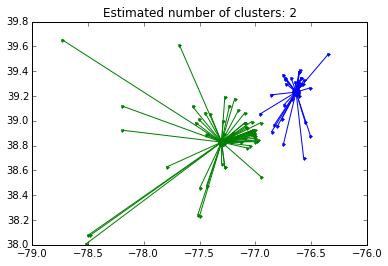

In [14]:
compute_affinity(df, 100)